In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

In [3]:
df = yf.download('MSFT', start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
df['ma_20'] = df.Close.rolling(20).mean()
df['vol'] = df.Close.rolling(20).std()
df['upper_bb'] = df.ma_20 + (2 * df.vol)
df['lower_bb'] = df.ma_20 - (2 * df.vol)

In [5]:
df['rsi'] = ta.momentum.rsi(df.Close, window=6)

In [6]:
conditions = [(df.rsi < 30) & (df.Close < df.lower_bb),
              (df.rsi > 70) & (df.Close > df.upper_bb)]

In [7]:
choices = ['Buy', 'Sell']

In [8]:
df['signal'] = np.select(conditions,choices)

In [9]:
df.dropna(inplace=True)

In [10]:
df.signal = df.signal.shift()

In [11]:
df['shifted_Close'] = df.Close.shift()

In [12]:
position = False
buydates, selldates = [], []
buyprices, sellprices = [], []

for index, row in df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydates.append(index)
        buyprices.append(row.Open)
        position = True
    
    if position:
        if row['signal'] == 'Sell' or row.shifted_Close < 0.98 * buyprices[-1]:
            selldates.append(index)
            sellprices.append(row.Open)
            position = False

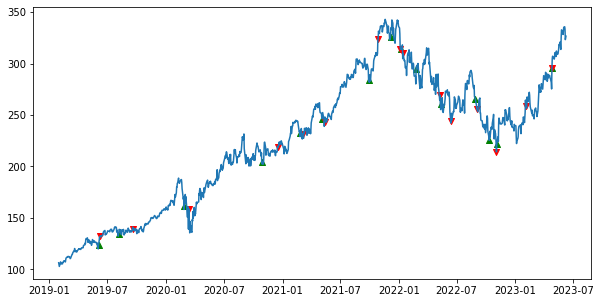

In [13]:
plt.figure(figsize = (10,5))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker = '^', c = 'g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker = 'v', c = 'r')

In [15]:
(pd.Series([(sell-buy) / buy for sell, buy in zip(sellprices,buyprices)]) + 1).prod() -1

0.33213297109721074